In [1]:
#!pip install openpyxl --upgrade --pre

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [4]:
df = pd.read_excel('Product_Sales_Dataset.xlsx')

# EDA

In [5]:
df.head()

,Year,Foot Number,Color,Price,Design,Quality,Sales,Product_id
0,2019,36,black,499.99,modern,luxury,80,BWZLT
1,2019,36,grey,499.99,modern,luxury,85,BWZLT
2,2019,36,white,499.99,modern,luxury,87,BWZLT
3,2019,36,colorful,499.99,modern,luxury,89,BWZLT
4,2019,36,gold,499.99,modern,luxury,57,BWZLT


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         3080 non-null   int64  
 1   Foot Number  3080 non-null   int64  
 2   Color        3080 non-null   object 
 3   Price        3080 non-null   float64
 4   Design       3080 non-null   object 
 5   Quality      3080 non-null   object 
 6   Sales        3080 non-null   int64  
 7   Product_id   3080 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 192.6+ KB


In [7]:
df[df['Year'] == 2019].info()

<class 'pandas.core.frame.DataFrame'>
Index: 380 entries, 0 to 2829
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         380 non-null    int64  
 1   Foot Number  380 non-null    int64  
 2   Color        380 non-null    object 
 3   Price        380 non-null    float64
 4   Design       380 non-null    object 
 5   Quality      380 non-null    object 
 6   Sales        380 non-null    int64  
 7   Product_id   380 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 26.7+ KB


In [8]:
df = df[df['Year'] != 2019] #we drop 2019, as we make an analysis on last five years

In [9]:
df.describe()

,Year,Foot Number,Price,Sales
count,2700.000000,2700.000000,2700.000000,2700.000000
mean,2022.122222,40.500000,180.511630,122.453704
std,1.359673,2.872813,152.626217,23.568204
min,2020.000000,36.000000,25.950000,41.000000
25%,2021.000000,38.000000,44.950000,107.000000
50%,2022.000000,40.500000,129.950000,124.000000
75%,2023.000000,43.000000,263.990000,141.000000
max,2024.000000,45.000000,493.990000,174.000000


In [10]:
df.nunique()

Year             5
Foot Number     10
Color            5
Price           81
Design           3
Quality          4
Sales          124
Product_id      89
dtype: int64

In [11]:
df = df.drop(columns=["Product_id"])

In [12]:
categorical_columns = ["Color", "Design", "Quality"]

In [13]:
df_dummies = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

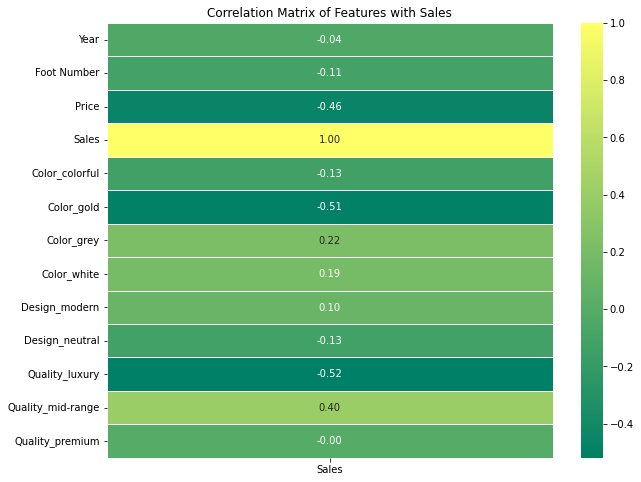

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_dummies.corr()['Sales'].to_frame(), annot=True, fmt=".2f", cmap="summer", cbar=True, linewidths=0.5)
plt.title("Correlation Matrix of Features with Sales")
plt.show()

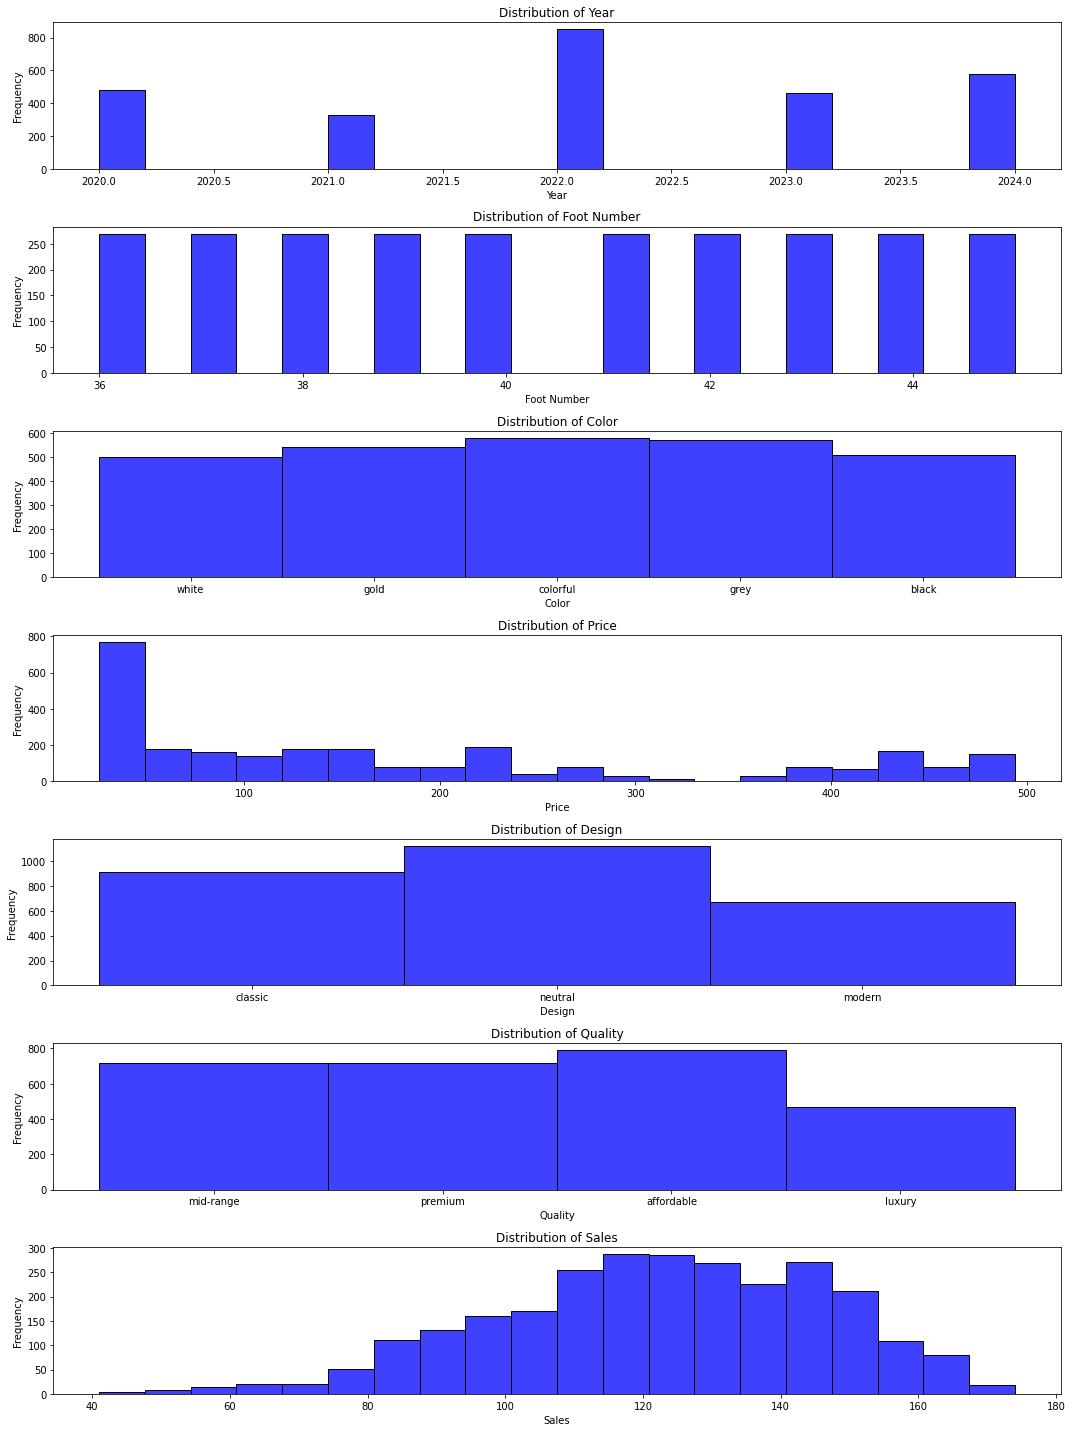

In [15]:
columns_to_plot = df.columns

plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(len(columns_to_plot), 1, i)
    sns.histplot(df[column], bins=20, color="blue")
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.tight_layout()

plt.show()

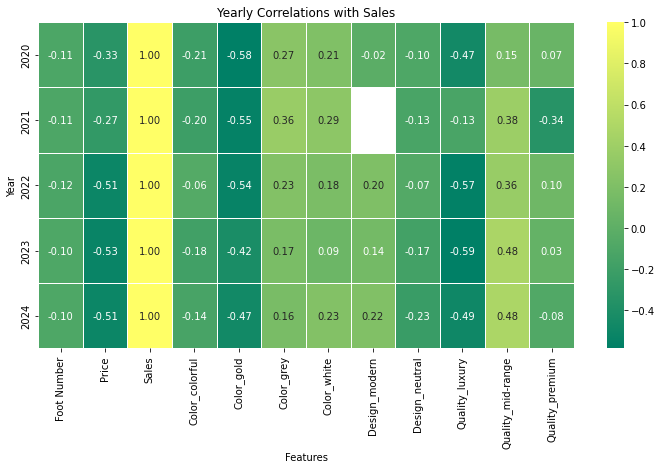

In [16]:
yearly_correlations = df_dummies.groupby("Year").corr()["Sales"].drop(columns=["Sales"]).unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(yearly_correlations, annot=True, cmap="summer", fmt=".2f", linewidths=0.5)
plt.title("Yearly Correlations with Sales")
plt.xlabel("Features")
plt.ylabel("Year")
plt.show()

# Models

In [17]:
X = df_dummies.drop(columns=["Sales"])
y = df_dummies["Sales"]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [18]:
#X_train.head()

In [19]:
#y_train.head()

### Decision Tree

In [20]:
dt_regressor = DecisionTreeRegressor(random_state=1)

scoring_metrics = {
    "R2": make_scorer(r2_score),
    "RMSE": make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False))
}

cv_results = {
    metric: cross_val_score(dt_regressor, X, y, scoring=scorer, cv=5)
    for metric, scorer in scoring_metrics.items()
}

cv_summary = {metric: (scores.mean(), scores.std()) for metric, scores in cv_results.items()}
cv_summary

{'R2': (0.8995786315414624, 0.014864751799123098),
 'RMSE': (7.364300184973179, 0.3702469251783169)}

In [21]:
dt_regressor.fit(X, y)

DecisionTreeRegressor(random_state=1)

### Linear Regression

In [22]:
linear_regressor = LinearRegression()

linear_cv_results = {
    metric: cross_val_score(linear_regressor, X, y, scoring=scorer, cv=5)
    for metric, scorer in scoring_metrics.items()
}

linear_cv_summary = {metric: (scores.mean(), scores.std()) for metric, scores in linear_cv_results.items()}
linear_cv_summary

{'R2': (0.7268701393635962, 0.02746626847837285),
 'RMSE': (12.172237839041285, 0.19102785084780333)}

In [23]:
linear_regressor.fit(X, y)
linear_regressor.intercept_, linear_regressor.coef_

(111.33309210935577,
 array([ 3.12599370e-02, -8.89315376e-01, -2.04596482e-03, -2.08464210e+01,
        -3.86649846e+01, -3.89884245e+00, -3.59707079e+00,  4.95053370e-01,
        -1.74019953e+00, -2.97473180e+01,  1.44251350e+01, -2.74988406e-01]))

In [35]:
X

,Year,Foot Number,Price,Color_colorful,Color_gold,Color_grey,Color_white,Design_modern,Design_neutral,Quality_luxury,Quality_mid-range,Quality_premium
50,2021,36,99.95,False,False,False,True,False,False,False,True,False
51,2021,36,99.95,False,True,False,False,False,False,False,True,False
52,2021,36,99.95,True,False,False,False,False,False,False,True,False
53,2021,37,99.95,False,False,False,True,False,False,False,True,False
54,2021,37,99.95,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3075,2021,43,141.95,True,False,False,False,False,False,False,True,False
3076,2021,44,141.95,False,False,True,False,False,False,False,True,False
3077,2021,44,141.95,True,False,False,False,False,False,False,True,False
3078,2021,45,141.95,False,False,True,False,False,False,False,True,False


In [ ]:
data to predict = {Year': 2024,
 'Foot Number': 36,
 'Color': 'black',
 'Price': 499.99,
 'Design': 'modern',
 'Quality': 'luxury'}



### Decision Tree
R²: 0.90 (±0.015) \
Explains a significant portion of the variance in sales. \
\
RMSE: 7.36 (±0.37) \
Low prediction error compared to actual sales. 

### Linear Regression
R²: 0.73 (±0.27) \
Explains only 73% of the variance in sales, significantly lower than the Decision Tree. \
\
RMSE: 12.17 (±0.19) \
Higher error, showing less accurate predictions compared to the Decision Tree. 


### Conclusion
-The Decision Tree model significantly outperforms Linear Regression across all metrics, making it the better choice for this dataset. \
-The low R² and high RMSE for Linear Regression suggest non-linear relationships in the data that the Decision Tree can better capture. 